In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import networkx as nx
from matplotlib.ticker import ScalarFormatter
import numpy as np
import matplotlib.colors as mc
import colorsys

In [2]:
def read_edgelist(file):
    List_of_all_lines = file.readlines()
    edgelist = []
    
    for eachline in List_of_all_lines:
        eachline = eachline.strip()
        stripList = eachline.split(" ")
        edgelist.append((int(stripList[0]), int(stripList[1])))

    return edgelist

def create_graph_using_edgelist(edgelist, multi = 0):
    if multi == 1:
        G = nx.MultiGraph()
    else:
        G = nx.Graph()
    for eachedge in edgelist:
        G.add_edge(eachedge[0], eachedge[1])

    return G

def check_maxDegree_criterion(dataframe, foldername):
    networks = list(dataframe['Network'])
    edges = list(dataframe['edges'])
    nodes = list(dataframe['nodes'])
    gap = list(dataframe['gap'])
    time = list(dataframe['time'])

    networkcol = []
    nodescol = []
    edgescol = []
    gapcol = []
    timecol = []
    for i in range(len(networks)):
        file1 = open('../../NetworkRepository/' + foldername + '/' + str(networks[i]) + ".txt", "r")
        edgelist = read_edgelist(file1)
        G = create_graph_using_edgelist(edgelist, multi = 1)
        G3 = nx.convert_node_labels_to_integers(G)  
        m = G3.number_of_edges()
        degrees = list(nx.degree(G3))
        degreeList = []
        for eachtuple in degrees:
            degreeList.append(eachtuple[1])
            
        sorted_degrees = sorted(degreeList, reverse = True)
        if sorted_degrees[0]*sorted_degrees[0] <= 2*m/3:
            networkcol.append(networks[i])
            nodescol.append(nodes[i])
            edgescol.append(edges[i])
            gapcol.append(gap[i])
            timecol.append(time[i])
            
    filtered_csv = pd.DataFrame()
    filtered_csv['Network'] = networkcol
    filtered_csv['nodes'] = nodescol
    filtered_csv['edges'] = edgescol
    filtered_csv['gap'] = gapcol
    filtered_csv['time'] = timecol
            
    return filtered_csv
    
def check_density_criterion(dataframe, foldername, loopy):
    networks = list(dataframe['Network'])
    edges = list(dataframe['edges'])
    nodes = list(dataframe['nodes'])
    gap = list(dataframe['gap'])
    time = list(dataframe['time'])
    count = 0

    networkcol = []
    nodescol = []
    edgescol = []
    gapcol = []
    timecol = []
    for i in range(len(networks)):
        file1 = open('../../NetworkRepository/' + foldername + '/' + str(networks[i]) + ".txt", "r")
        edgelist = read_edgelist(file1)
        G = create_graph_using_edgelist(edgelist, multi = 0)
        G3 = nx.convert_node_labels_to_integers(G)  
        m = G3.number_of_edges()
        n = G3.number_of_nodes()
        
        if loopy == 1:
            rho = m/(n*n/2)
        else:
            rho = m/(n*(n-1)/2)
        d = 2*rho - rho*rho
            
        if d < 0.25:
            count += 1
            networkcol.append(networks[i])
            nodescol.append(nodes[i])
            edgescol.append(edges[i])
            gapcol.append(gap[i])
            timecol.append(time[i])
            
    filtered_csv = pd.DataFrame()
    filtered_csv['Network'] = networkcol
    filtered_csv['nodes'] = nodescol
    filtered_csv['edges'] = edgescol
    filtered_csv['gap'] = gapcol
    filtered_csv['time'] = timecol
            
    return filtered_csv

In [3]:
def lighten_color(color, amount=0.5):
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [4]:
def plot_edges_scatterplot(graphspace, dataframe, dataframe_cross):
    fit_line = []
    edges_test = list(dataframe['edges'])
    gap_test = list(dataframe['gap'])
    names = list(dataframe['Network'])
    
    if graphspace == "MultiLoopyVertex" or graphspace == "MultiOnlyVertex":
        factor = 2.3
    else:
        factor = 2
    
    for m in list(dataframe['edges']):
        fit_line.append(m*factor)
        
    plt.figure(figsize = (6, 3))
    label_text = str(factor)+"m" 
    
    plt.scatter(dataframe['edges'], dataframe['gap'], c='red', s = 100, alpha = 0.5)
    
    scatter_cross_edge = []
    scatter_cross_gap = []
    cross_edges = list(dataframe_cross['edges'])
    cross_gaps = list(dataframe_cross['gap'])
    cross_names = list(dataframe_cross['Network'])
    for i in range(len(cross_names)):
        if cross_names[i] not in names:
            scatter_cross_edge.append(cross_edges[i])
            scatter_cross_gap.append(cross_gaps[i])
            
    plt.scatter(scatter_cross_edge, scatter_cross_gap, c='gray', s = 50, alpha = 0.3, marker = "^")

    if graphspace == "MultiLoopyVertex" or graphspace == "MultiOnlyVertex":
        plt.plot(dataframe['edges'], fit_line, color=lighten_color('c', 1), markersize = 1, alpha = 0.8, ls = "-", label = label_text, linewidth=8)
    else:
        plt.plot(dataframe['edges'], fit_line, color="b", markersize = 1, alpha = 0.8, ls = "-", label = label_text, linewidth=8)
    
    ticks = ["0", "1", "2", "3", "4", "5", "6", "7"]
    xvals_for_ticks = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000]
    plt.xticks(xvals_for_ticks, ticks)
    
    y_values = list(dataframe['gap'])
    ticks = ["0", "5", "10", "15"]
    yvals_for_ticks = [0, 50000, 100000, 150000]
    plt.yticks(yvals_for_ticks, ticks)
    
    
    plt.yticks(fontsize = 15, color = 'black')
    plt.xticks(fontsize = 15, color = 'black')
    plt.ylim(-7000,165000)
    
    if graphspace == "LoopyOnlyVertex" or graphspace == "LoopyOnlyStub":
        plt.xlim(-1500, 76000)
    else:
        plt.xlim(-1500, 51000)
    
    plt.xlabel("Number of edges (10\u2074), m", fontsize = 15, color = 'black')
    plt.ylabel("Sampling gap (10\u2074), \u03B7\u2080", fontsize = 15 , color = 'black')
            
    plt.legend(fontsize = 15, loc="upper left")
            
    plt.show()

In [5]:
def generate_filtered_DF(graphspace):
    results = pd.read_csv("../../Output/EstimatedSamplingGaps/" + graphspace + "_SamplingGaps.csv")
    if graphspace == "SimpleStub" or graphspace == "SimpleVertex":
        networks_for_plot = check_density_criterion(results, "SimpleNetworks", loopy = 0)
    elif graphspace == "LoopyOnlyStub" or graphspace == "LoopyOnlyVertex":
        networks_for_plot = check_density_criterion(results, "LoopyOnlyNetworks", loopy = 1)
    elif graphspace == "MultiOnlyVertex":
        networks_for_plot = check_maxDegree_criterion(results, "MultiOnlyNetworks")
    elif graphspace == "MultiOnlyStub":
        networks_for_plot = results
    elif graphspace == "MultiLoopyVertex":
        networks_for_plot = check_maxDegree_criterion(results, "MultiLoopyNetworks")
    elif graphspace == "MultiLoopyStub":
        networks_for_plot = results

    networks_for_plot.to_csv("../../Output/EstimatedSamplingGaps/Filtered_" + graphspace + "_SamplingGaps.csv", index = False)  

In [6]:
def plot_samplingGapEstimates(graphspace):
    generate_filtered_DF(graphspace)
        
    networks_for_plot = pd.read_csv("../../Output/EstimatedSamplingGaps/Filtered_" + graphspace + "_SamplingGaps.csv")
    networks_for_cross = pd.read_csv("../../Output/EstimatedSamplingGaps/" + graphspace + "_SamplingGaps.csv")

    plot_edges_scatterplot(graphspace, networks_for_plot, networks_for_cross)

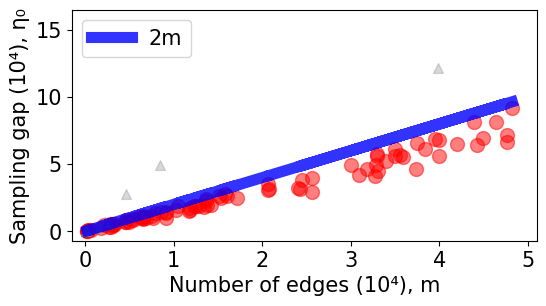

In [7]:
graphspace = "SimpleStub"
plot_samplingGapEstimates(graphspace)

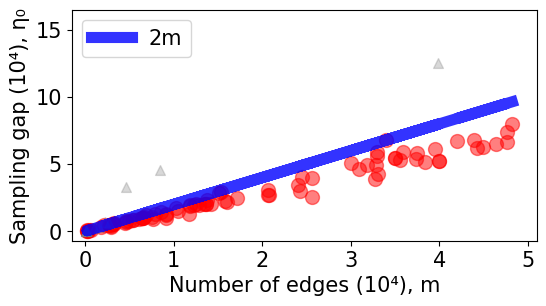

In [8]:
graphspace = "SimpleVertex"
plot_samplingGapEstimates(graphspace)

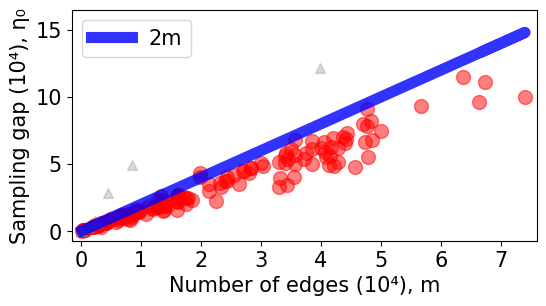

In [9]:
graphspace = "LoopyOnlyStub"
plot_samplingGapEstimates(graphspace)

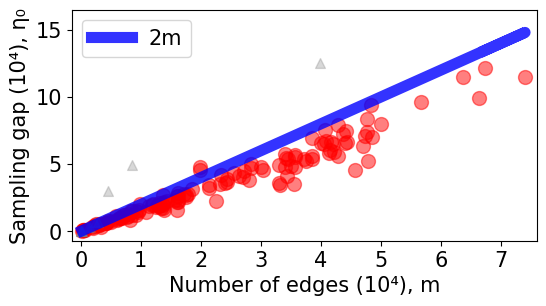

In [10]:
graphspace = "LoopyOnlyVertex"
plot_samplingGapEstimates(graphspace)

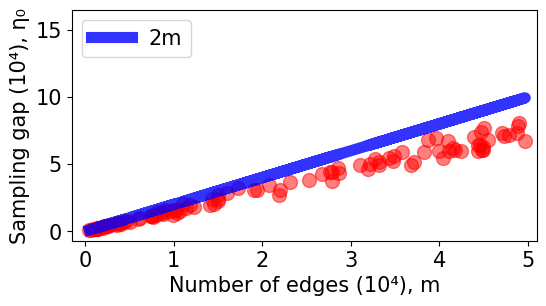

In [11]:
graphspace = "MultiLoopyStub"
plot_samplingGapEstimates(graphspace)

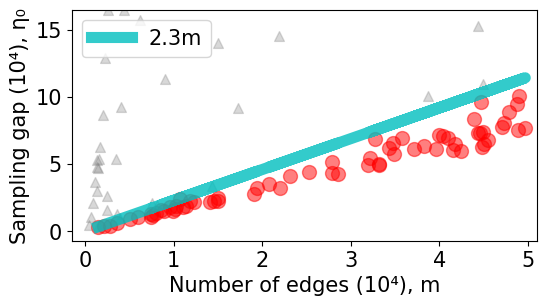

In [12]:
graphspace = "MultiLoopyVertex"
plot_samplingGapEstimates(graphspace)

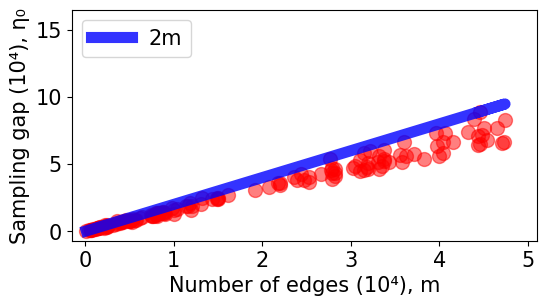

In [13]:
graphspace = "MultiOnlyStub"
plot_samplingGapEstimates(graphspace)

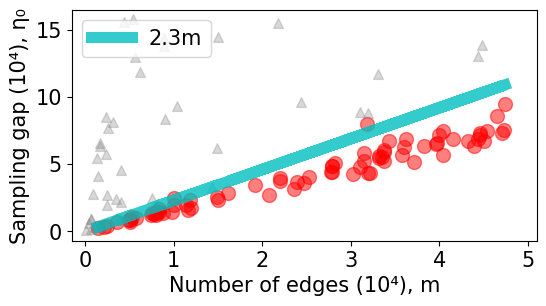

In [14]:
graphspace = "MultiOnlyVertex"
plot_samplingGapEstimates(graphspace)